## Case Study 2: How Can a Wellness Technology Company Play It Smart?

***

## Project Description

You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.


## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Data sources used

FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal ﬁtness tracker from thirty ﬁtbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.


## Business Task

1.What are some trends in smart device usage?

2.How could these trends apply to Bellabeat customers?

3.How could these trends help influence Bellabeat marketing strategy?

## Metrics

## Assumptions

## Data Tasks

- 
- 
- 
- 
- 
-

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("dailyActivity_merged.csv",parse_dates=['ActivityDate'])

In [3]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.00,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.00,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.00,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.00,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.00,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,8877689391,2016-05-08,10686,8.11,8.11,0.00,1.08,0.20,6.80,0.00,17,4,245,1174,2847
923,8877689391,2016-05-09,20226,18.25,18.25,0.00,11.10,0.80,6.24,0.05,73,19,217,1131,3710
924,8877689391,2016-05-10,10733,8.15,8.15,0.00,1.35,0.46,6.28,0.00,18,11,224,1187,2832
925,8877689391,2016-05-11,21420,19.56,19.56,0.00,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        927 non-null    int64         
 1   ActivityDate              927 non-null    datetime64[ns]
 2   TotalSteps                927 non-null    int64         
 3   TotalDistance             927 non-null    float64       
 4   TrackerDistance           927 non-null    float64       
 5   LoggedActivitiesDistance  927 non-null    float64       
 6   VeryActiveDistance        927 non-null    float64       
 7   ModeratelyActiveDistance  927 non-null    float64       
 8   LightActiveDistance       927 non-null    float64       
 9   SedentaryActiveDistance   927 non-null    float64       
 10  VeryActiveMinutes         927 non-null    int64         
 11  FairlyActiveMinutes       927 non-null    int64         
 12  LightlyActiveMinutes  

In [5]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00
mean,4882640571.93,7699.44,5.54,5.52,0.11,1.52,0.57,3.36,0.00,21.44,13.74,193.88,995.10,2320.29
std,2426719255.56,5080.00,3.92,3.91,0.62,2.67,0.89,2.03,0.01,32.99,20.07,108.71,299.01,706.58
min,1503960366.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
25%,2320127002.00,3854.00,2.67,2.67,0.00,0.00,0.00,1.97,0.00,0.00,0.00,129.00,731.50,1841.00
50%,4558609924.00,7451.00,5.28,5.28,0.00,0.24,0.25,3.38,0.00,4.00,7.00,199.00,1062.00,2156.00
75%,6962181067.00,10752.00,7.73,7.72,0.00,2.10,0.81,4.79,0.00,32.00,20.00,264.50,1233.00,2797.50
max,8877689391.00,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00


In [6]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'], dtype='object')

In [7]:
df.Id.value_counts()

8053475328    31
4702921684    31
6962181067    31
8583815059    31
7086361926    31
8378563200    31
5553957443    31
8877689391    31
2320127002    30
4020332650    30
1503960366    30
4388161847    30
2026352035    30
1927972279    30
2022484408    30
1844505072    30
1624580081    30
4558609924    30
4319703577    30
4445114986    30
1644430081    30
2873212765    30
5577150313    30
3977333714    30
8792009665    29
6290855005    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

We will select users that completed min 30 days of activities recorded

In [8]:
df = pd.read_csv("daily.csv", parse_dates=['ActivityDate'])

In [9]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.00,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.00,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.00,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.00,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.00,2.71,0.41,5.04,0.00,36,10,221,773,1863


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        728 non-null    int64         
 1   ActivityDate              728 non-null    datetime64[ns]
 2   TotalSteps                728 non-null    int64         
 3   TotalDistance             728 non-null    float64       
 4   TrackerDistance           728 non-null    float64       
 5   LoggedActivitiesDistance  728 non-null    float64       
 6   VeryActiveDistance        728 non-null    float64       
 7   ModeratelyActiveDistance  728 non-null    float64       
 8   LightActiveDistance       728 non-null    float64       
 9   SedentaryActiveDistance   728 non-null    float64       
 10  VeryActiveMinutes         728 non-null    int64         
 11  FairlyActiveMinutes       728 non-null    int64         
 12  LightlyActiveMinutes  

### Groupby Function

In [11]:
df.groupby("Id").mean()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12520.63,8.07,8.07,0.00,2.95,0.82,4.29,0.00,40.00,19.80,227.27,828.43,1876.97
1624580081,5836.33,3.98,3.98,0.00,0.97,0.37,2.63,0.01,8.97,6.00,155.03,1270.00,1499.40
1644430081,7282.97,5.30,5.30,0.00,0.73,0.95,3.61,0.00,9.57,21.37,178.47,1161.87,2811.30
1844505072,2666.07,1.76,1.76,0.00,0.01,0.05,1.70,0.00,0.13,1.33,119.30,1223.13,1603.77
1927972279,946.67,0.66,0.66,0.00,0.10,0.03,0.52,0.00,1.37,0.80,39.87,1329.13,2199.13
2022484408,11445.77,8.14,8.14,0.00,2.46,0.72,4.96,0.00,36.97,19.47,258.17,1125.40,2531.87
2026352035,5456.07,3.39,3.39,0.00,0.01,0.01,3.37,0.00,0.10,0.27,253.77,701.40,1546.53
2320127002,4785.40,3.23,3.23,0.00,0.11,0.10,3.02,0.00,1.40,2.67,200.53,1233.10,1744.13
2873212765,7555.43,5.10,5.10,0.00,0.70,0.29,4.11,0.01,14.57,6.33,309.33,1109.77,1933.17


In [12]:
df.groupby("Id").median()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12438.00,8.08,8.08,0.00,2.87,0.73,4.41,0.00,38.50,19.50,219.00,790.00,1848.00
1624580081,4500.00,2.92,2.92,0.00,0.00,0.00,1.98,0.00,0.00,0.00,150.50,1288.50,1440.50
1644430081,6683.50,4.86,4.86,0.00,0.30,0.56,3.34,0.00,4.00,12.50,157.50,1179.00,2802.50
1844505072,2405.00,1.59,1.59,0.00,0.00,0.00,1.47,0.00,0.00,0.00,103.50,1310.50,1569.00
1927972279,198.00,0.14,0.14,0.00,0.00,0.00,0.14,0.00,0.00,0.00,14.50,1418.00,2105.50
2022484408,11658.00,8.32,8.32,0.00,2.56,0.67,4.76,0.00,36.00,18.50,271.50,1115.50,2536.50
2026352035,5260.50,3.27,3.27,0.00,0.00,0.00,3.27,0.00,0.00,0.00,248.00,676.00,1538.00
2320127002,5068.00,3.42,3.42,0.00,0.00,0.00,3.23,0.00,0.00,0.00,214.50,1206.00,1779.50
2873212765,7836.00,5.28,5.28,0.00,0.09,0.15,4.63,0.00,2.00,5.00,330.50,1090.00,1908.50


In [13]:
df2 = df.groupby(["Id","ActivityDate"]).sum()
df2

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories
Id         ActivityDate                                                                                                                                                                                                                                                            
1503960366 2016-04-12         13162           8.50             8.50                      0.00                1.88                      0.55                 6.06                     0.00                 25                   13                   328               728      1985
           2016-04-13         10735           6.97             6.97                      0.00                1.57                      0.69                 4.71                     0.00                 21                   19                   217               776      1797
           2016-04-14         10460           6.74             6.74                      0.00                2.44                      0.40                 3.91                     0.00                 30                   11                   181              1218      1776
           2016-04-15          9762           6.28             6.28                      0.00                2.14                      1.26                 2.83                     0.00                 29                   34                   209               726      1745
           2016-04-16         12669           8.16             8.16                      0.00                2.71                      0.41                 5.04                     0.00                 36                   10                   221               773      1863
...                             ...            ...              ...                       ...                 ...                       ...                  ...                      ...                ...                  ...                   ...               ...       ...
8877689391 2016-05-08         10686           8.11             8.11                      0.00                1.08                      0.20                 6.80                     0.00                 17                    4                   245              1174      2847
           2016-05-09         20226          18.25            18.25                      0.00               11.10                      0.80                 6.24                     0.05                 73                   19                   217              1131      3710
           2016-05-10         10733           8.15             8.15                      0.00                1.35                      0.46                 6.28                     0.00                 18                   11                   224              1187      2832
           2016-05-11         21420          19.56            19.56                      0.00               13.22                      0.41                 5.89                     0.00                 88                   12                   213              1127      3832
           2016-05-12          8064           6.12             6.12                      0.00                1.82                      0.04                 4.25                     0.00                 23                    1                   137               770      1849

[728 rows x 13 columns]

In [14]:
df2.reset_index(inplace=True)

In [15]:
df2.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.00,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.00,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.00,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.00,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.00,2.71,0.41,5.04,0.00,36,10,221,773,1863


In [16]:
df2.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00
mean,4500534136.04,8125.62,5.85,5.85,0.06,1.72,0.63,3.41,0.00,24.47,14.99,192.74,975.74,2357.72
std,2407280084.21,5091.21,4.00,3.99,0.38,2.88,0.93,1.91,0.01,35.52,20.83,97.15,291.40,730.03
min,1503960366.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2026352035.00,4363.00,2.98,2.98,0.00,0.00,0.00,2.18,0.00,0.00,0.00,139.00,722.75,1820.75
50%,4388161847.00,8079.50,5.60,5.60,0.00,0.41,0.31,3.40,0.00,7.00,8.00,196.50,1036.00,2178.00
75%,6962181067.00,11201.75,8.05,8.03,0.00,2.37,0.89,4.75,0.00,37.00,21.00,255.25,1214.25,2883.25
max,8877689391.00,36019.00,28.03,28.03,4.08,21.92,6.48,10.71,0.11,210.00,143.00,475.00,1440.00,4552.00


In [17]:
df2.Id.nunique()

24

In [18]:
df2.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2873212765, 3977333714,
       4020332650, 4319703577, 4388161847, 4445114986, 4558609924,
       4702921684, 5553957443, 5577150313, 6962181067, 7086361926,
       8053475328, 8378563200, 8583815059, 8877689391], dtype=int64)

### Pandas-Profiling Reports

In [19]:
profile = ProfileReport(df=df, title='Fitbit Report', minimal=True)

In [20]:
profile.to_notebook_iframe()

In [21]:
profile.to_file("fitbit_report.html")

## Data Visualization

### Univariate Data Exploration

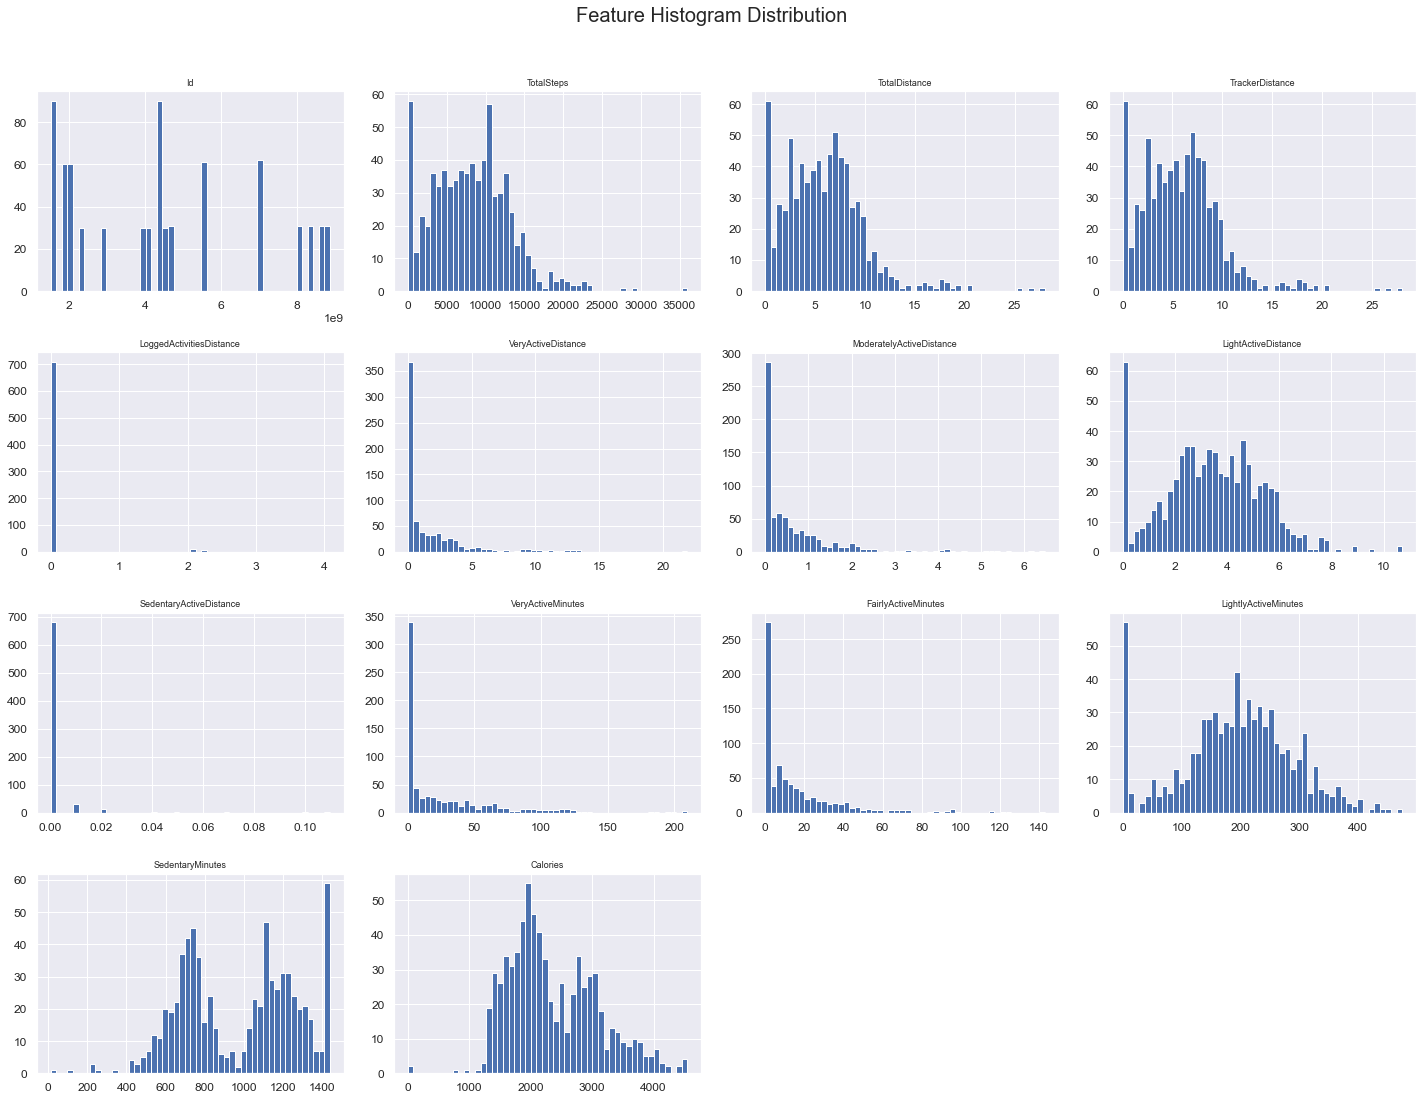

In [22]:
df2.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Histogram Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

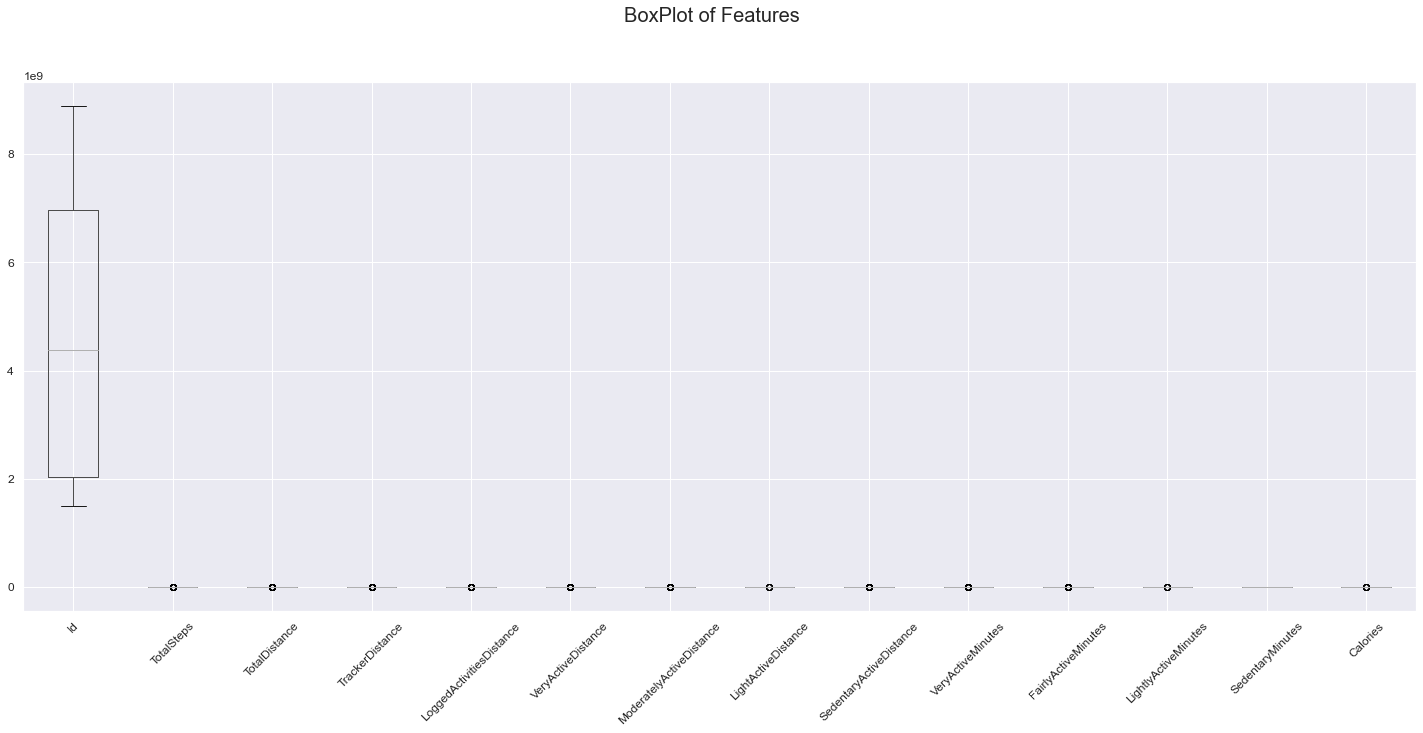

In [23]:
df2.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot of Features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Time-Series Analysis

In [24]:
df2.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2873212765, 3977333714,
       4020332650, 4319703577, 4388161847, 4445114986, 4558609924,
       4702921684, 5553957443, 5577150313, 6962181067, 7086361926,
       8053475328, 8378563200, 8583815059, 8877689391], dtype=int64)

In [25]:
df2.groupby("ActivityDate").sum()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ActivityDate,,,,,,,,,,,,,,
2016-04-12,107272996198,221231,160.79,160.79,2.25,48.34,10.28,89.07,0.00,615,236,4979,23245,59553
2016-04-13,107272996198,178087,125.40,125.40,2.09,31.24,9.81,77.36,0.02,528,258,4398,23930,55610
2016-04-14,107272996198,206100,150.07,150.07,2.25,43.71,10.86,95.15,0.03,607,290,5168,23456,58619
2016-04-15,107272996198,191487,133.97,133.97,0.00,34.56,11.37,86.12,0.02,629,290,5018,22498,58526
2016-04-16,107272996198,206970,151.54,151.54,0.00,54.82,13.65,78.67,0.01,776,328,4463,23121,58483
2016-04-17,107272996198,155664,109.37,109.37,0.00,28.24,13.47,65.26,0.01,516,329,3702,24908,53899
2016-04-18,107272996198,197359,141.43,141.43,2.09,44.60,17.69,78.76,0.01,656,415,4404,25255,56779
2016-04-19,107272996198,206452,151.13,151.13,2.25,55.85,15.85,79.26,0.00,714,417,4434,23648,57611
2016-04-20,107272996198,192576,141.67,141.67,2.09,47.14,14.38,80.02,0.02,587,370,4485,23220,56403


In [26]:
timeseries = df2.groupby("ActivityDate").sum()

In [27]:
timeseries

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ActivityDate,,,,,,,,,,,,,,
2016-04-12,107272996198,221231,160.79,160.79,2.25,48.34,10.28,89.07,0.00,615,236,4979,23245,59553
2016-04-13,107272996198,178087,125.40,125.40,2.09,31.24,9.81,77.36,0.02,528,258,4398,23930,55610
2016-04-14,107272996198,206100,150.07,150.07,2.25,43.71,10.86,95.15,0.03,607,290,5168,23456,58619
2016-04-15,107272996198,191487,133.97,133.97,0.00,34.56,11.37,86.12,0.02,629,290,5018,22498,58526
2016-04-16,107272996198,206970,151.54,151.54,0.00,54.82,13.65,78.67,0.01,776,328,4463,23121,58483
2016-04-17,107272996198,155664,109.37,109.37,0.00,28.24,13.47,65.26,0.01,516,329,3702,24908,53899
2016-04-18,107272996198,197359,141.43,141.43,2.09,44.60,17.69,78.76,0.01,656,415,4404,25255,56779
2016-04-19,107272996198,206452,151.13,151.13,2.25,55.85,15.85,79.26,0.00,714,417,4434,23648,57611
2016-04-20,107272996198,192576,141.67,141.67,2.09,47.14,14.38,80.02,0.02,587,370,4485,23220,56403


In [28]:
timeseries.drop("Id", axis=1,inplace=True)

In [29]:
timeseries

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ActivityDate,,,,,,,,,,,,,
2016-04-12,221231,160.79,160.79,2.25,48.34,10.28,89.07,0.00,615,236,4979,23245,59553
2016-04-13,178087,125.40,125.40,2.09,31.24,9.81,77.36,0.02,528,258,4398,23930,55610
2016-04-14,206100,150.07,150.07,2.25,43.71,10.86,95.15,0.03,607,290,5168,23456,58619
2016-04-15,191487,133.97,133.97,0.00,34.56,11.37,86.12,0.02,629,290,5018,22498,58526
2016-04-16,206970,151.54,151.54,0.00,54.82,13.65,78.67,0.01,776,328,4463,23121,58483
2016-04-17,155664,109.37,109.37,0.00,28.24,13.47,65.26,0.01,516,329,3702,24908,53899
2016-04-18,197359,141.43,141.43,2.09,44.60,17.69,78.76,0.01,656,415,4404,25255,56779
2016-04-19,206452,151.13,151.13,2.25,55.85,15.85,79.26,0.00,714,417,4434,23648,57611
2016-04-20,192576,141.67,141.67,2.09,47.14,14.38,80.02,0.02,587,370,4485,23220,56403


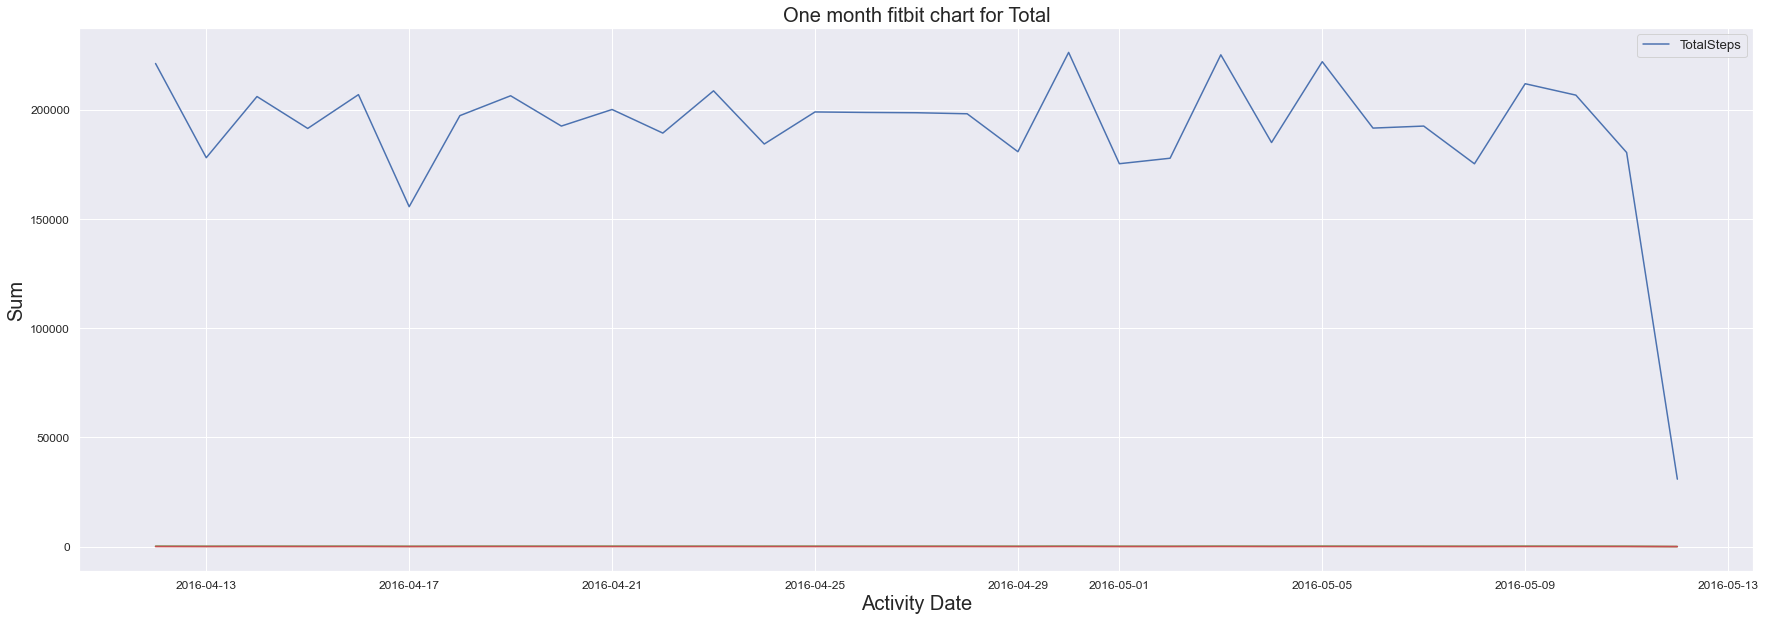

In [30]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.index,y=timeseries.TotalSteps,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.TotalDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.TrackerDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.LoggedActivitiesDistance,data=timeseries, estimator=None)
plt.title("One month fitbit chart for Total", fontsize=20)
plt.xlabel("Activity Date", fontsize=20)
plt.ylabel("Sum", fontsize=20)
plt.legend(['TotalSteps'])
plt.show()

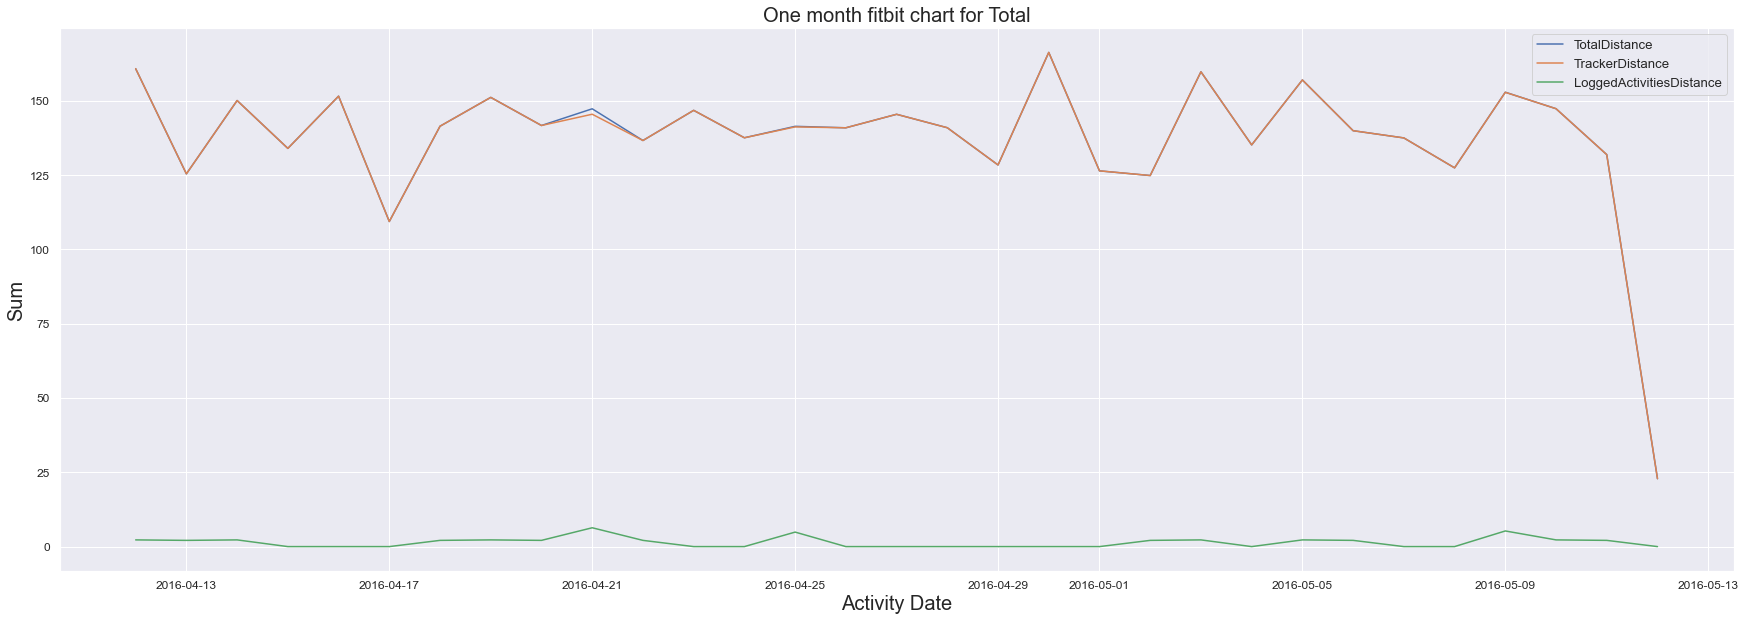

In [31]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.index,y=timeseries.TotalDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.TrackerDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.LoggedActivitiesDistance,data=timeseries, estimator=None)
plt.title("One month fitbit chart for Total", fontsize=20)
plt.xlabel("Activity Date", fontsize=20)
plt.ylabel("Sum", fontsize=20)
plt.legend(['TotalDistance','TrackerDistance','LoggedActivitiesDistance'])
plt.show()

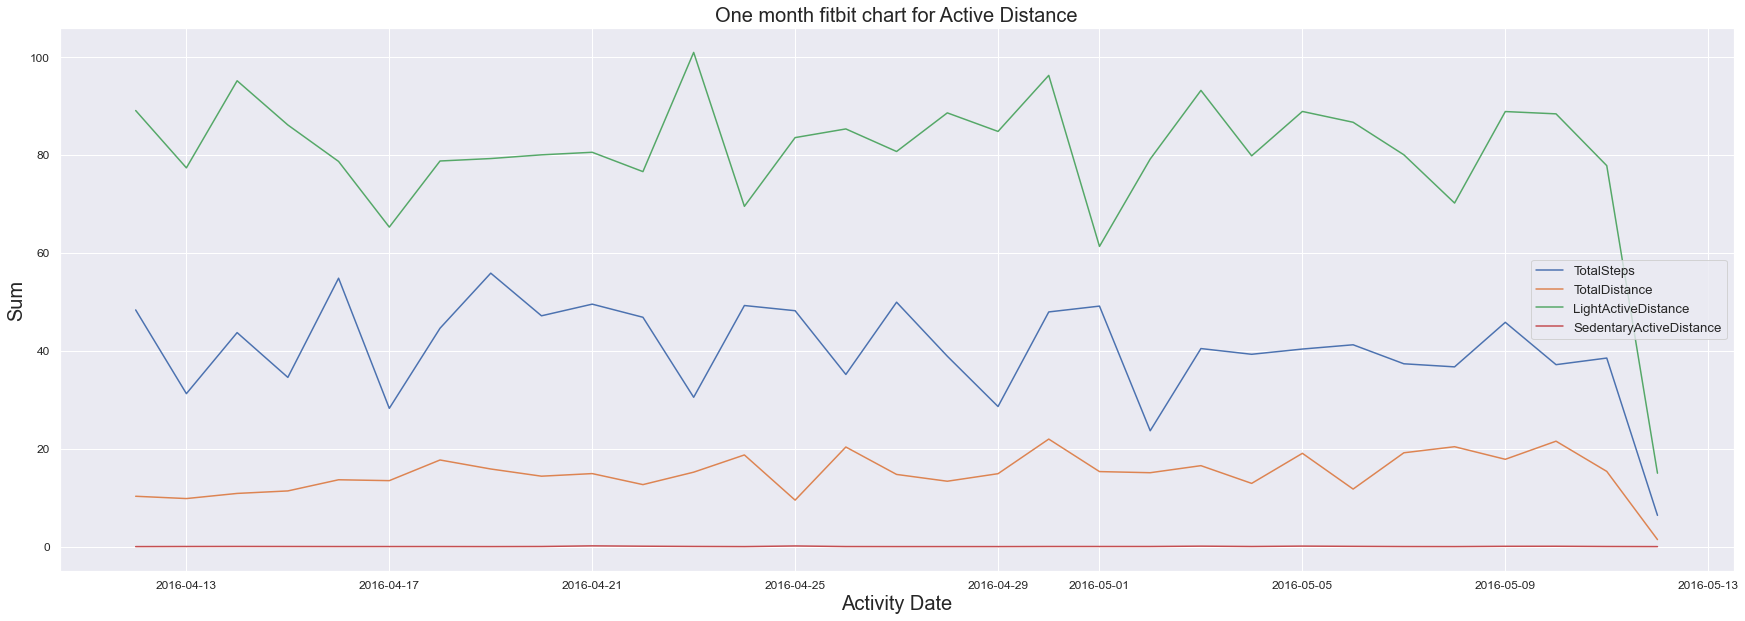

In [32]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.index,y=timeseries.VeryActiveDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.ModeratelyActiveDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.LightActiveDistance,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.SedentaryActiveDistance,data=timeseries, estimator=None)
plt.title("One month fitbit chart for Active Distance", fontsize=20)
plt.xlabel("Activity Date", fontsize=20)
plt.ylabel("Sum", fontsize=20)
plt.legend(['TotalSteps','TotalDistance','LightActiveDistance','SedentaryActiveDistance'])
plt.show()

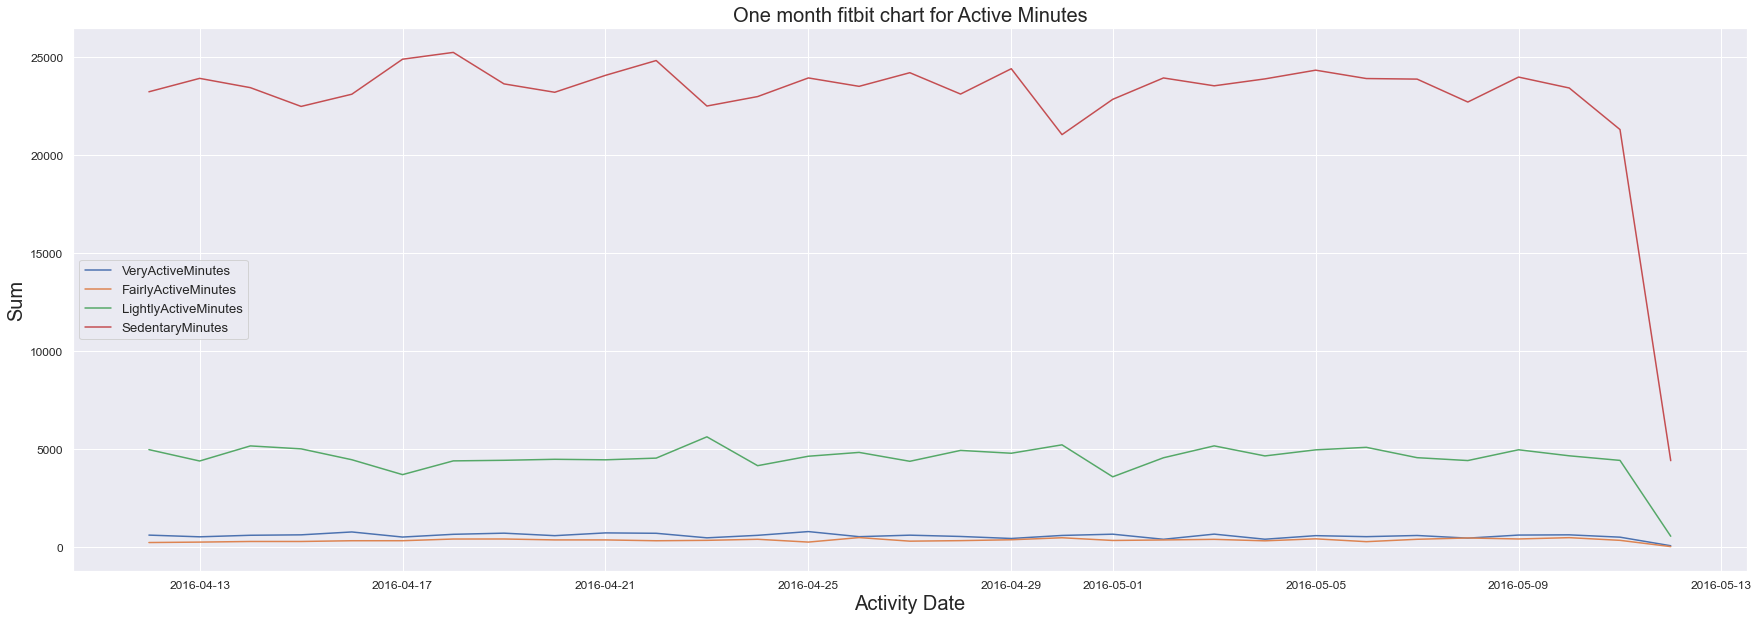

In [33]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.index,y=timeseries.VeryActiveMinutes,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.FairlyActiveMinutes,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.LightlyActiveMinutes,data=timeseries, estimator=None)
sns.lineplot(x=timeseries.index,y=timeseries.SedentaryMinutes,data=timeseries, estimator=None)
plt.title("One month fitbit chart for Active Minutes", fontsize=20)
plt.xlabel("Activity Date", fontsize=20)
plt.ylabel("Sum", fontsize=20)
plt.legend(['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'])
plt.show()

In [34]:
timeseries.columns

Index(['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'], dtype='object')

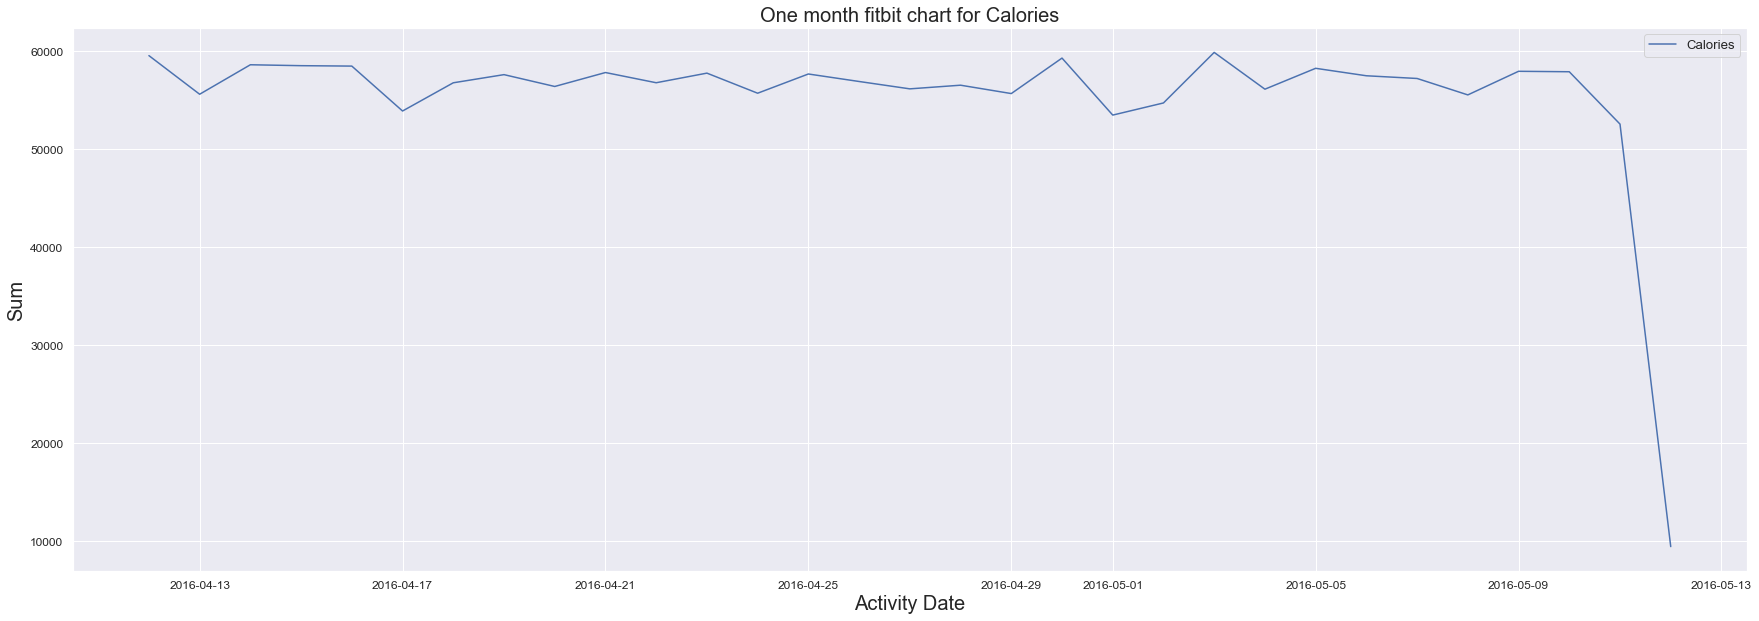

In [35]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.index,y=timeseries.Calories,data=timeseries, estimator=None)
plt.title("One month fitbit chart for Calories", fontsize=20)
plt.xlabel("Activity Date", fontsize=20)
plt.ylabel("Sum", fontsize=20)
plt.legend(['Calories'])
plt.show()

In [36]:
df3 = df.groupby(["Id"]).sum()
df3

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,375619,242.10,242.10,0.00,88.61,24.62,128.74,0.00,1200,594,6818,24853,56309
1624580081,175090,119.43,119.43,0.00,29.12,11.18,78.89,0.18,269,180,4651,38100,44982
1644430081,218489,158.86,158.86,0.00,21.90,28.53,108.27,0.12,287,641,5354,34856,84339
1844505072,79982,52.89,52.89,0.00,0.26,1.52,51.07,0.00,4,40,3579,36694,48113
1927972279,28400,19.67,19.67,0.00,2.97,0.97,15.72,0.00,41,24,1196,39874,65974
2022484408,343373,244.20,244.20,0.00,73.79,21.65,148.78,0.00,1109,584,7745,33762,75956
2026352035,163682,101.59,101.59,0.00,0.19,0.35,101.01,0.00,3,8,7613,21042,46396
2320127002,143562,97.03,97.03,0.00,3.31,3.03,90.60,0.00,42,80,6016,36993,52324
2873212765,226663,153.04,153.04,0.00,20.96,8.56,123.34,0.16,437,190,9280,33293,57995


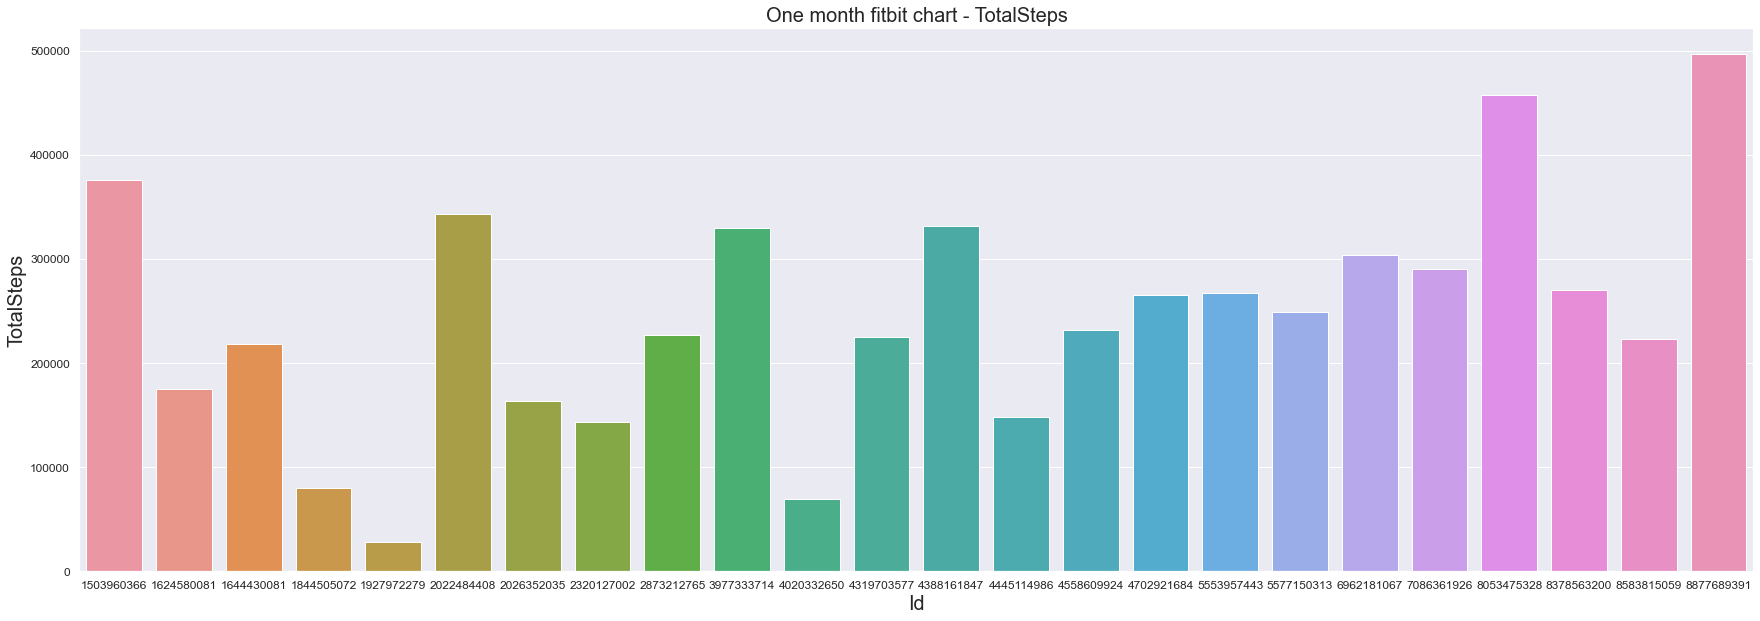

In [37]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x=df3.index,y=df3.TotalSteps,data=df3, ci=None)
plt.title("One month fitbit chart - TotalSteps", fontsize=20)
plt.xlabel("Id", fontsize=20)
plt.ylabel("TotalSteps", fontsize=20)

plt.show()

In [38]:
df3.columns

Index(['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'], dtype='object')

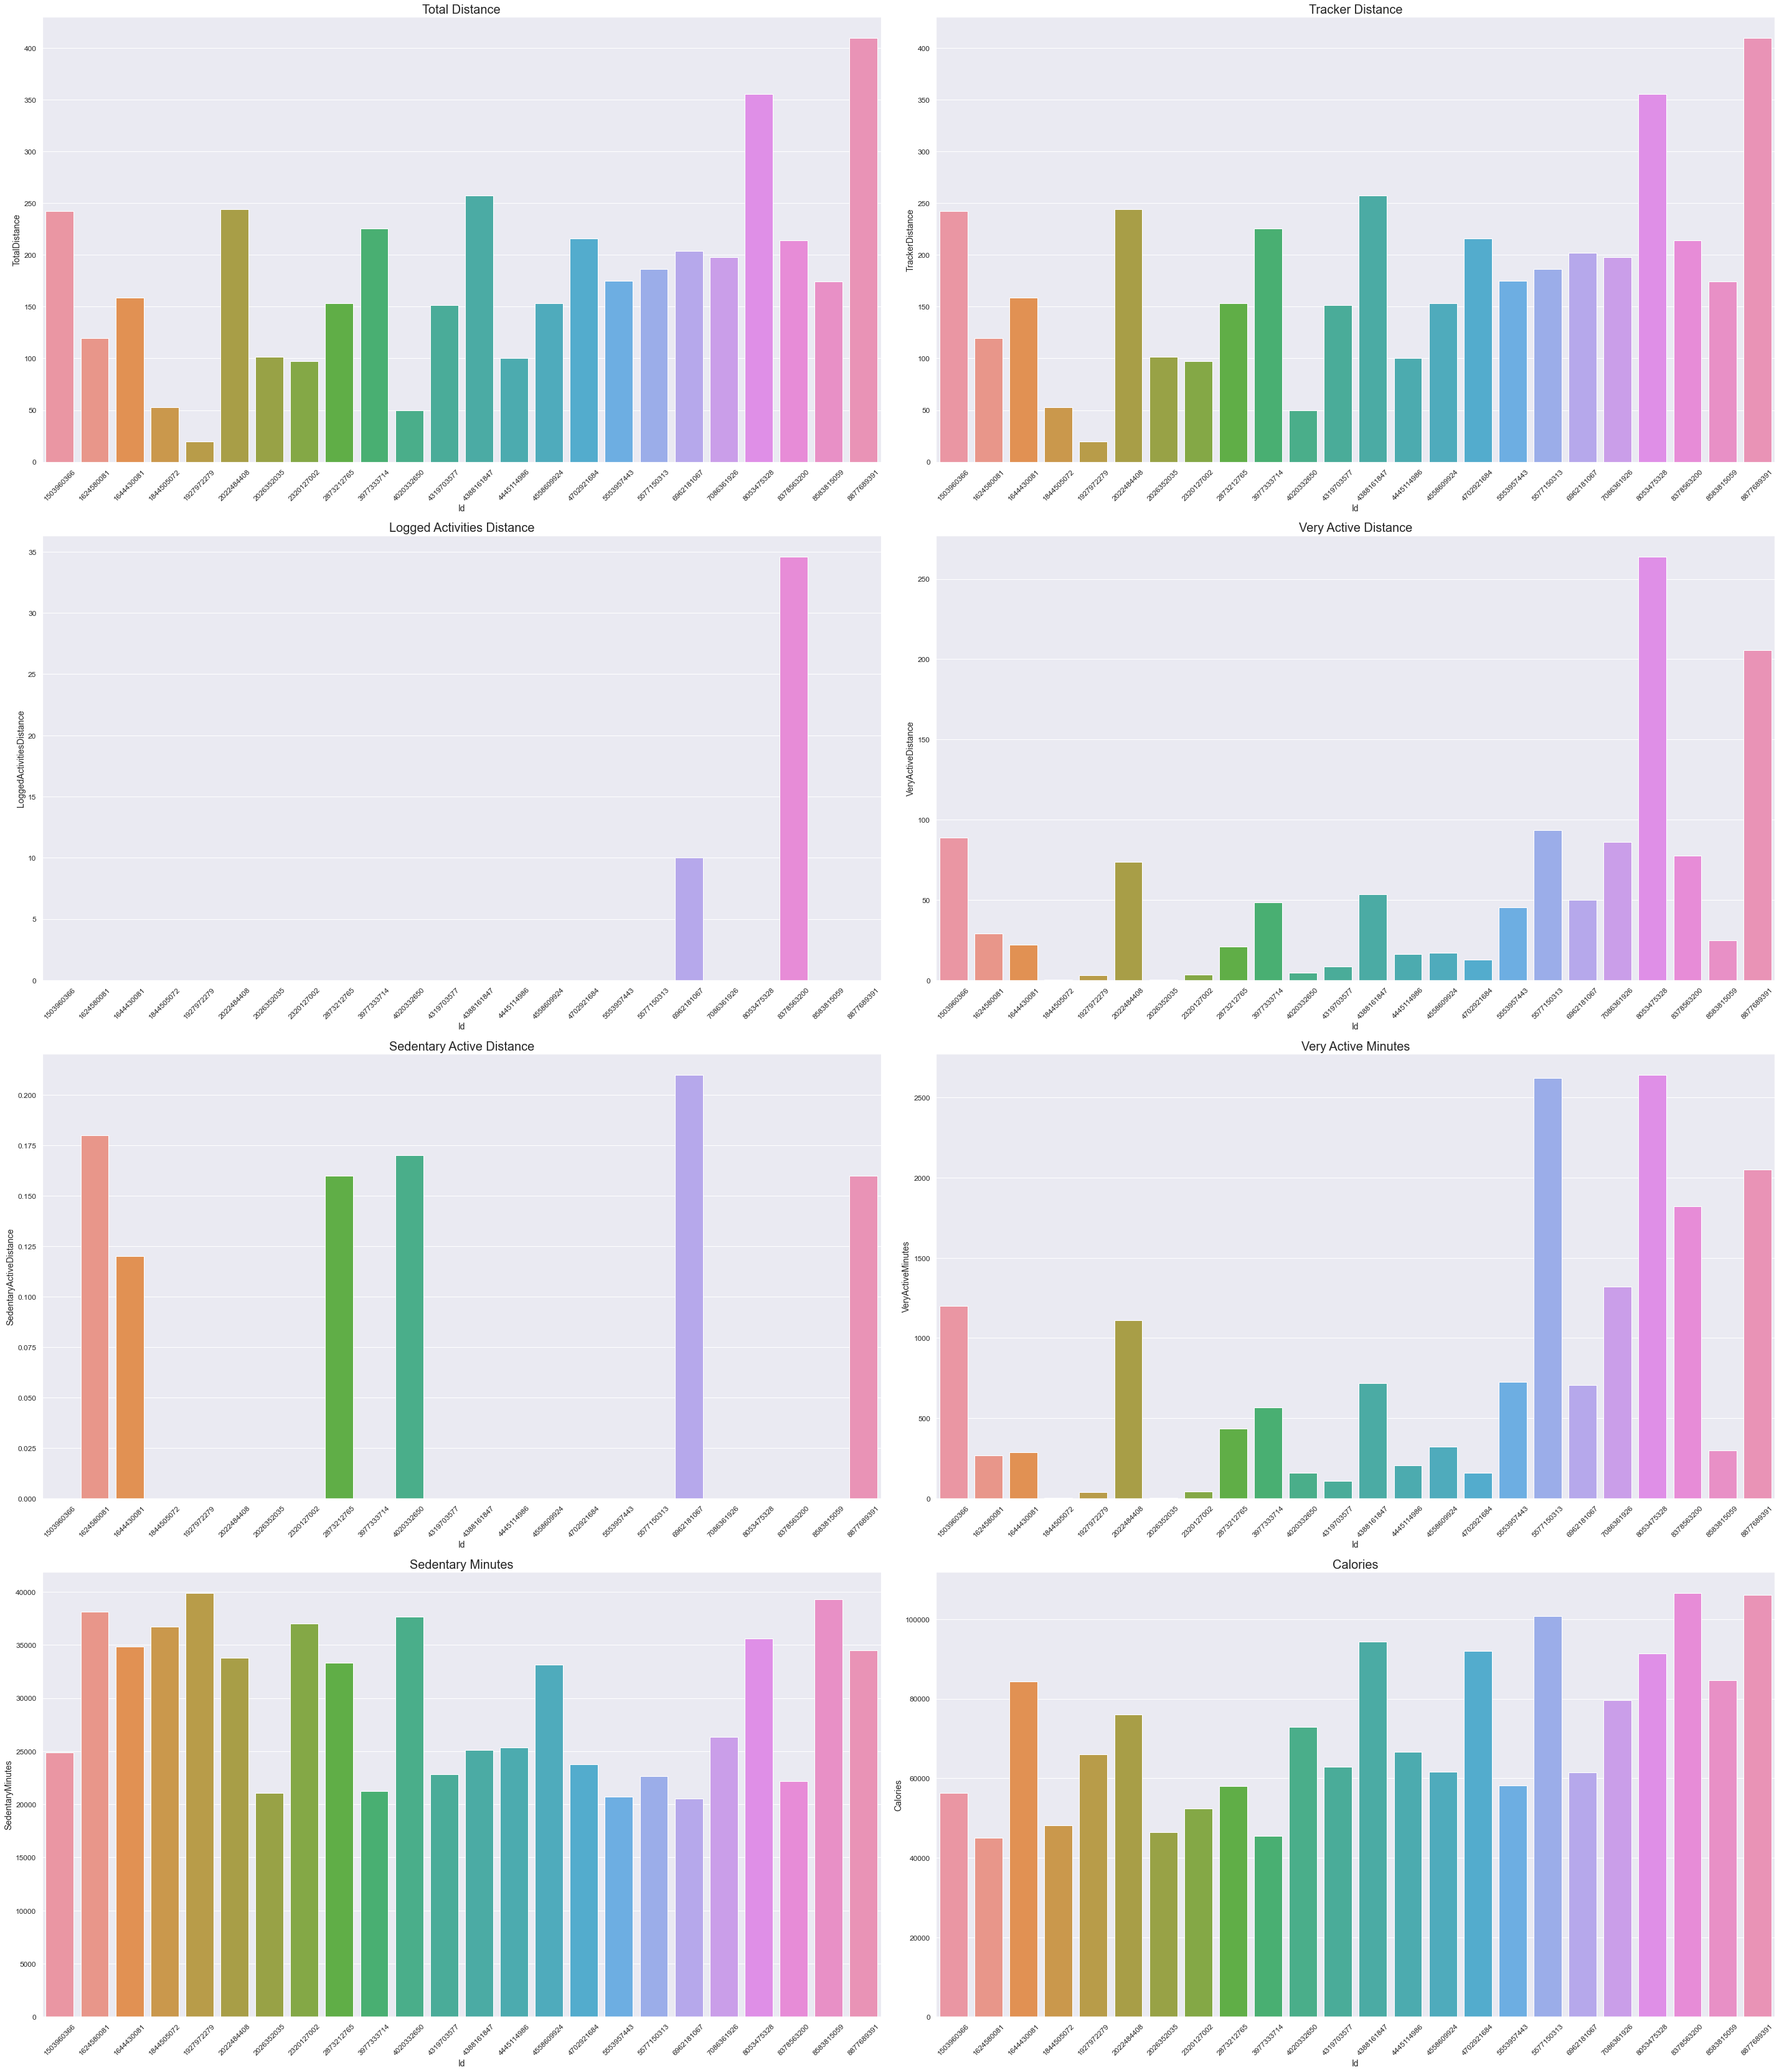

In [39]:
fig = plt.figure(figsize=(40,80))

plt.subplot(7,2,1)
plt.xticks(rotation=45)
plt.title("Total Distance", size=20)
sns.barplot(x=df3.index,y=df3.TotalDistance,data=df3, ci=None)

plt.subplot(7,2,2)
plt.xticks(rotation=45)
plt.title("Tracker Distance", size=20)
sns.barplot(x=df3.index,y=df3.TrackerDistance,data=df3, ci=None)

plt.subplot(7,2,3)
plt.xticks(rotation=45)
plt.title("Logged Activities Distance", size=20)
sns.barplot(x=df3.index,y=df3.LoggedActivitiesDistance,data=df3, ci=None)

plt.subplot(7,2,4)
plt.xticks(rotation=45)
plt.title("Very Active Distance", size=20)
sns.barplot(x=df3.index,y=df3.VeryActiveDistance,data=df3, ci=None)

plt.subplot(7,2,5)
plt.xticks(rotation=45)
plt.title("Sedentary Active Distance", size=20)
sns.barplot(x=df3.index,y=df3.SedentaryActiveDistance,data=df3, ci=None)

plt.subplot(7,2,6)
plt.xticks(rotation=45)
plt.title("Very Active Minutes", size=20)
sns.barplot(x=df3.index,y=df3.VeryActiveMinutes,data=df3, ci=None)

plt.subplot(7,2,7)
plt.xticks(rotation=45)
plt.title("Sedentary Minutes", size=20)
sns.barplot(x=df3.index,y=df3.SedentaryMinutes,data=df3, ci=None)

plt.subplot(7,2,8)
plt.xticks(rotation=45)
plt.title("Calories", size=20)
sns.barplot(x=df3.index,y=df3.Calories,data=df3, ci=None)

plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

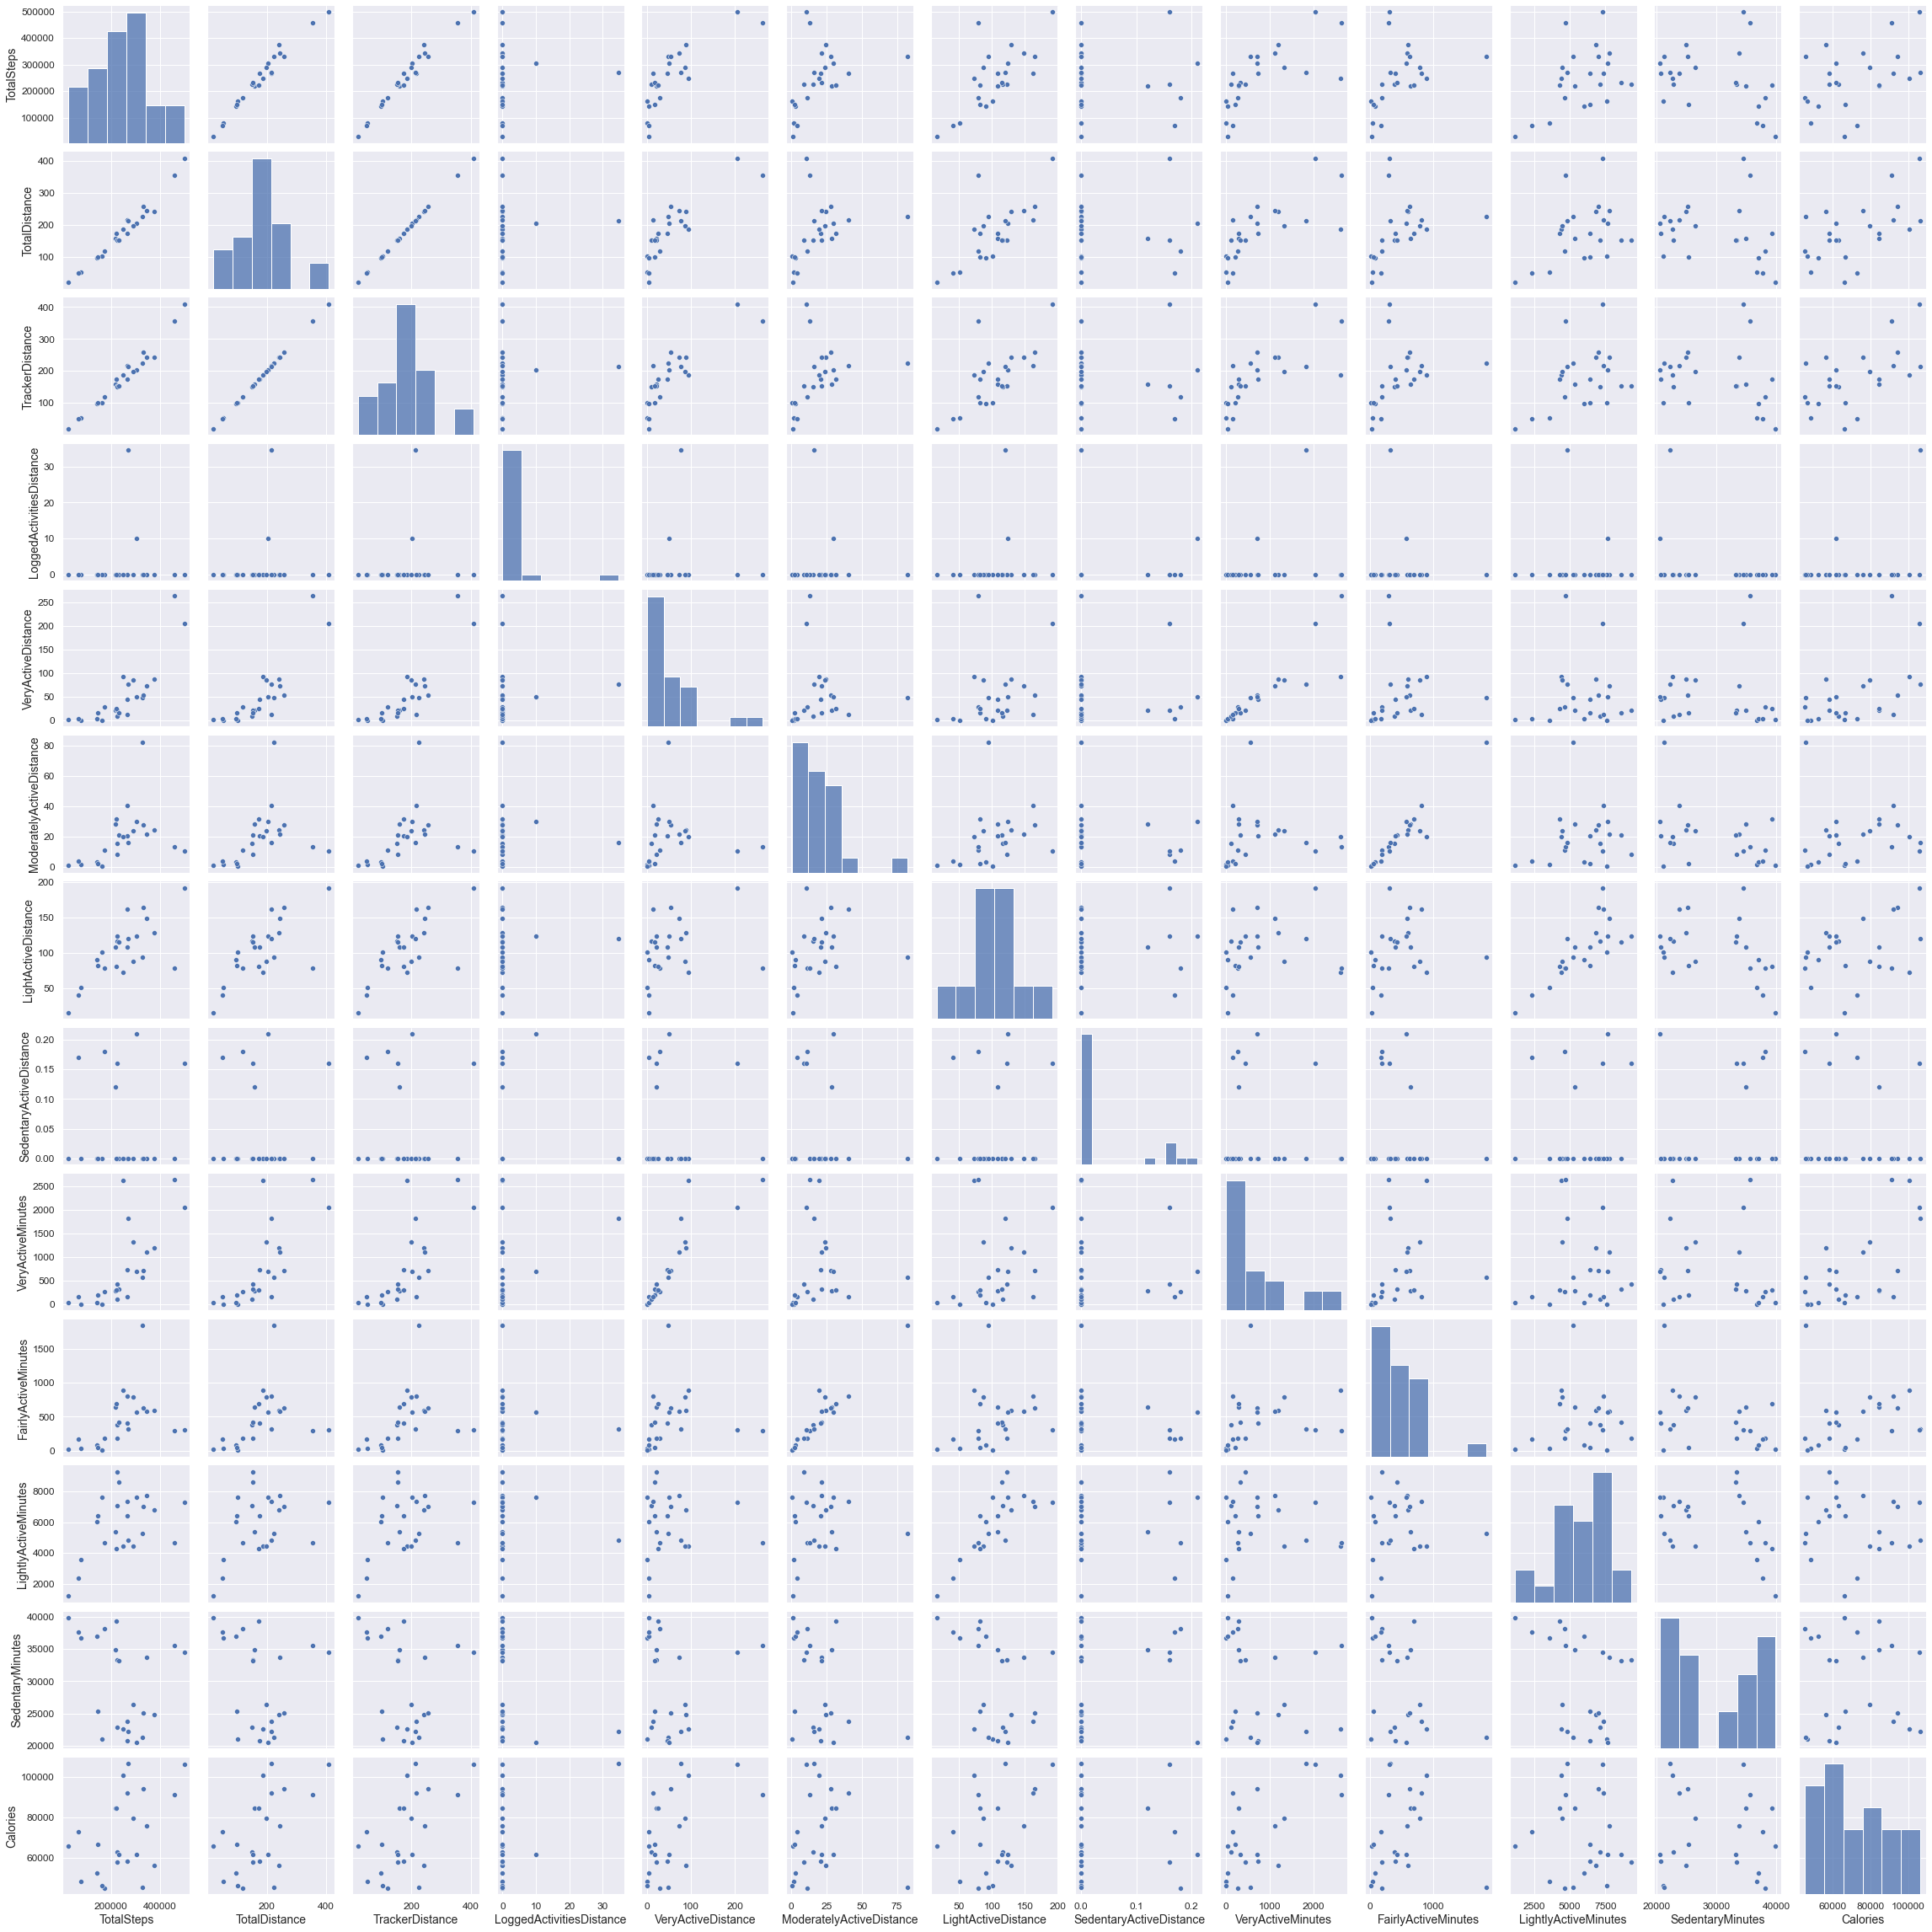

In [40]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df3)
plt.show()

### Correlation

In [41]:
df3.corr()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.00,0.98,0.98,0.07,0.82,0.43,0.72,0.01,0.71,0.44,0.45,-0.29,0.45
TotalDistance,0.98,1.00,1.00,0.10,0.85,0.38,0.71,0.03,0.73,0.40,0.39,-0.22,0.57
TrackerDistance,0.98,1.00,1.00,0.10,0.85,0.38,0.71,0.03,0.73,0.40,0.39,-0.22,0.57
LoggedActivitiesDistance,0.07,0.10,0.10,1.00,0.08,-0.00,0.12,0.02,0.27,-0.05,-0.05,-0.30,0.34
VeryActiveDistance,0.82,0.85,0.85,0.08,1.00,0.06,0.29,0.03,0.88,0.13,0.03,0.01,0.54
ModeratelyActiveDistance,0.43,0.38,0.38,-0.00,0.06,1.00,0.29,-0.12,0.08,0.96,0.13,-0.40,0.04
LightActiveDistance,0.72,0.71,0.71,0.12,0.29,0.29,1.00,0.10,0.23,0.24,0.79,-0.37,0.36
SedentaryActiveDistance,0.01,0.03,0.03,0.02,0.03,-0.12,0.10,1.00,-0.06,-0.17,0.08,0.25,-0.05
VeryActiveMinutes,0.71,0.73,0.73,0.27,0.88,0.08,0.23,-0.06,1.00,0.23,-0.02,-0.18,0.65
FairlyActiveMinutes,0.44,0.40,0.40,-0.05,0.13,0.96,0.24,-0.17,0.23,1.00,0.06,-0.41,0.14


In [42]:
df.corr()["Calories"].sort_values()

SedentaryMinutes           -0.13
SedentaryActiveDistance     0.03
ModeratelyActiveDistance    0.19
LightlyActiveMinutes        0.19
LoggedActivitiesDistance    0.25
FairlyActiveMinutes         0.27
LightActiveDistance         0.42
VeryActiveDistance          0.51
Id                          0.52
TotalSteps                  0.56
TotalDistance               0.63
TrackerDistance             0.63
VeryActiveMinutes           0.65
Calories                    1.00
Name: Calories, dtype: float64

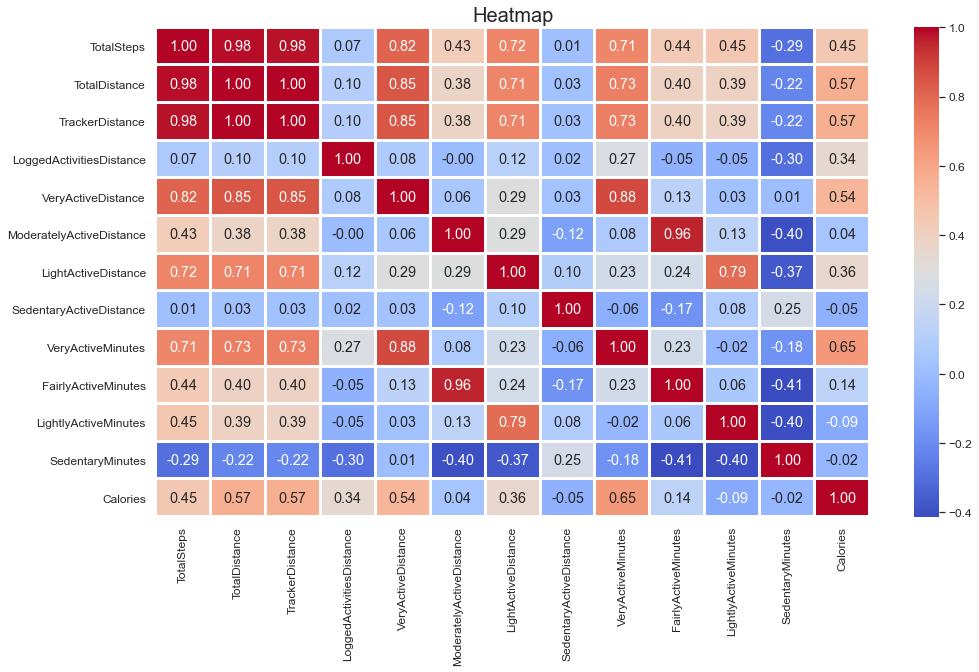

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Heatmap", fontsize=20)
plt.show()

### Treat Duplicate Values

In [44]:
df3.duplicated(keep='first').sum()

0

### Save to CSV

In [45]:
df3.to_csv("peruserid.csv", index=True)

## Regression Analysis

In [46]:
df3.columns

Index(['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'], dtype='object')

In [47]:
y = df['Calories']
X = df[['TotalSteps','VeryActiveDistance','VeryActiveMinutes']]

In [48]:
X = sm.add_constant(X)

In [49]:
model = sm.OLS(y,X).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.64e-97
Time:                        19:47:03   Log-Likelihood:                -5606.3
No. Observations:                 728   AIC:                         1.122e+04
Df Residuals:                     724   BIC:                         1.124e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1763.6289     42.176     41.816      0.000    1680.828    1846.430
TotalSteps             0.0479      0.006      7.830      0.000       0.036       0.060
VeryActiveDistance   -64.8767     13.725     -4.727      0.000     -91.823     -37.930
VeryActiveMinutes     12.9173      0.973     13.278      0.000      11.007      14.827
==============================================================================
Omnibus:                       10.843   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.650
Skew:                          -0.004   Prob(JB):                       0.0360
Kurtosis:                       2.532   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Plots

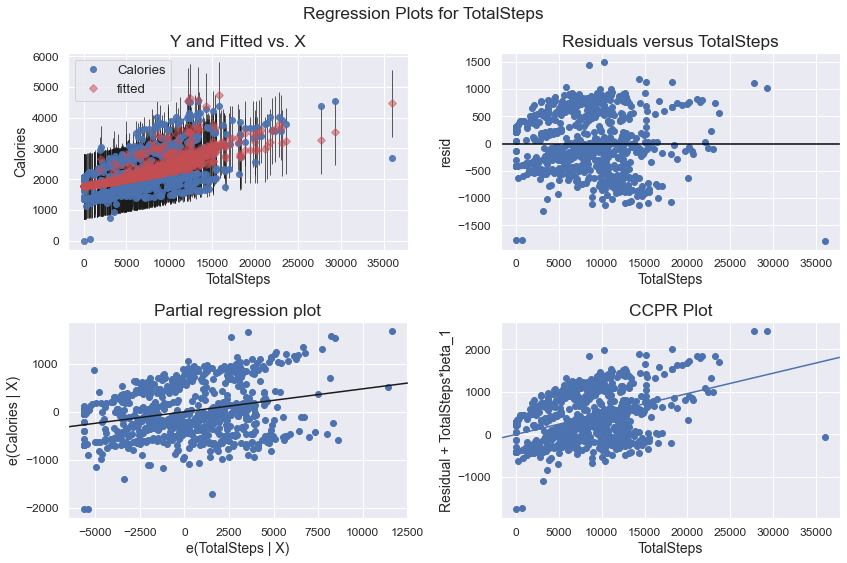

In [51]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'TotalSteps', fig=fig)

#### Python code done by Dennis Lam